## 5장 4절 머신러닝 분석과정 빠르게 맛보기 - 회귀분석

### 1. 데이터 확인

In [1]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

In [18]:
ca = fetch_california_housing()
price = ca.target

df_ca = pd.DataFrame(data = ca.data, columns=ca.feature_names)
df_ca['Price'] = price
df_ca.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [3]:
df_ca.shape

(20640, 9)

In [19]:
df_ca['dummy'] = 0
df_ca

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price,dummy
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,0
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,0
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,0
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,0
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,0
...,...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781,0
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771,0
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923,0
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847,0


In [20]:
df_ca.shape

(20640, 10)

In [21]:
df_ca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Price       20640 non-null  float64
 9   dummy       20640 non-null  int64  
dtypes: float64(9), int64(1)
memory usage: 1.6 MB


In [22]:
df_ca.isna().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Price         0
dummy         0
dtype: int64

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

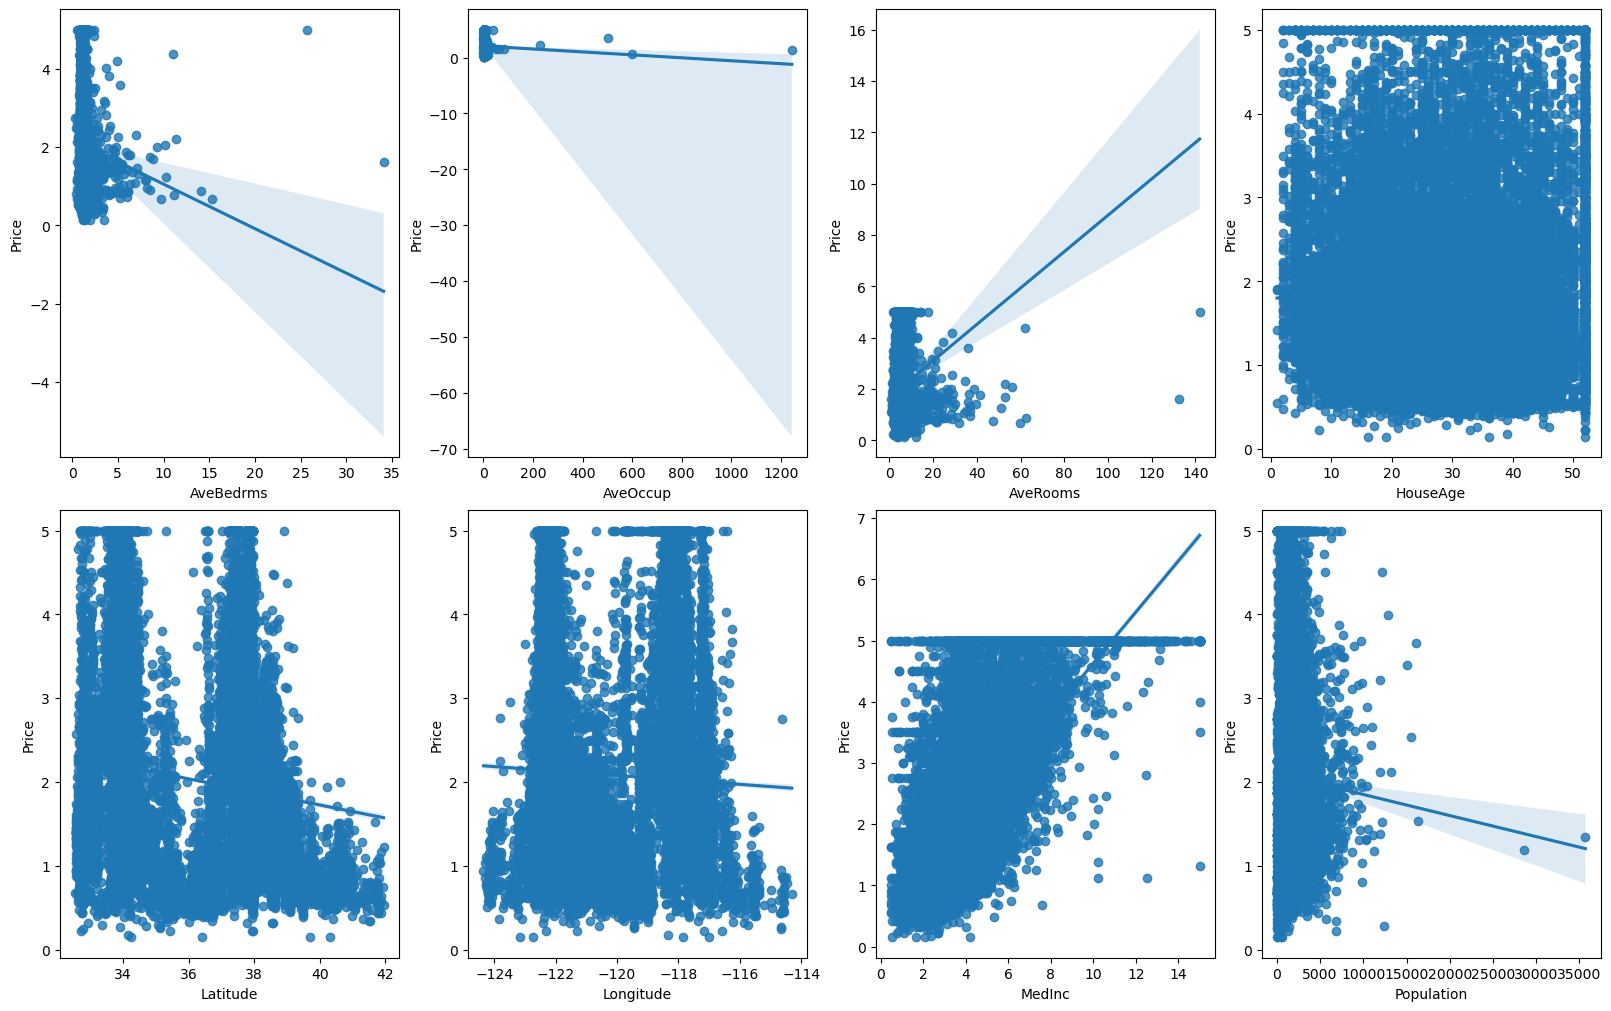

In [25]:
fig, axs = plt.subplots(figsize=(16,10), ncols=4, nrows=2, constrained_layout=True)
features = df_ca.columns.difference(['Price','dummy'])

for i, feature in zip(range(8), features):
    row=int(i/4)
    col = i%4
    sns.regplot(x=feature, y=df_ca['Price'], data=df_ca, ax=axs[row][col])

In [27]:
df_ca2 = df_ca.drop(columns='dummy')
df_ca2

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


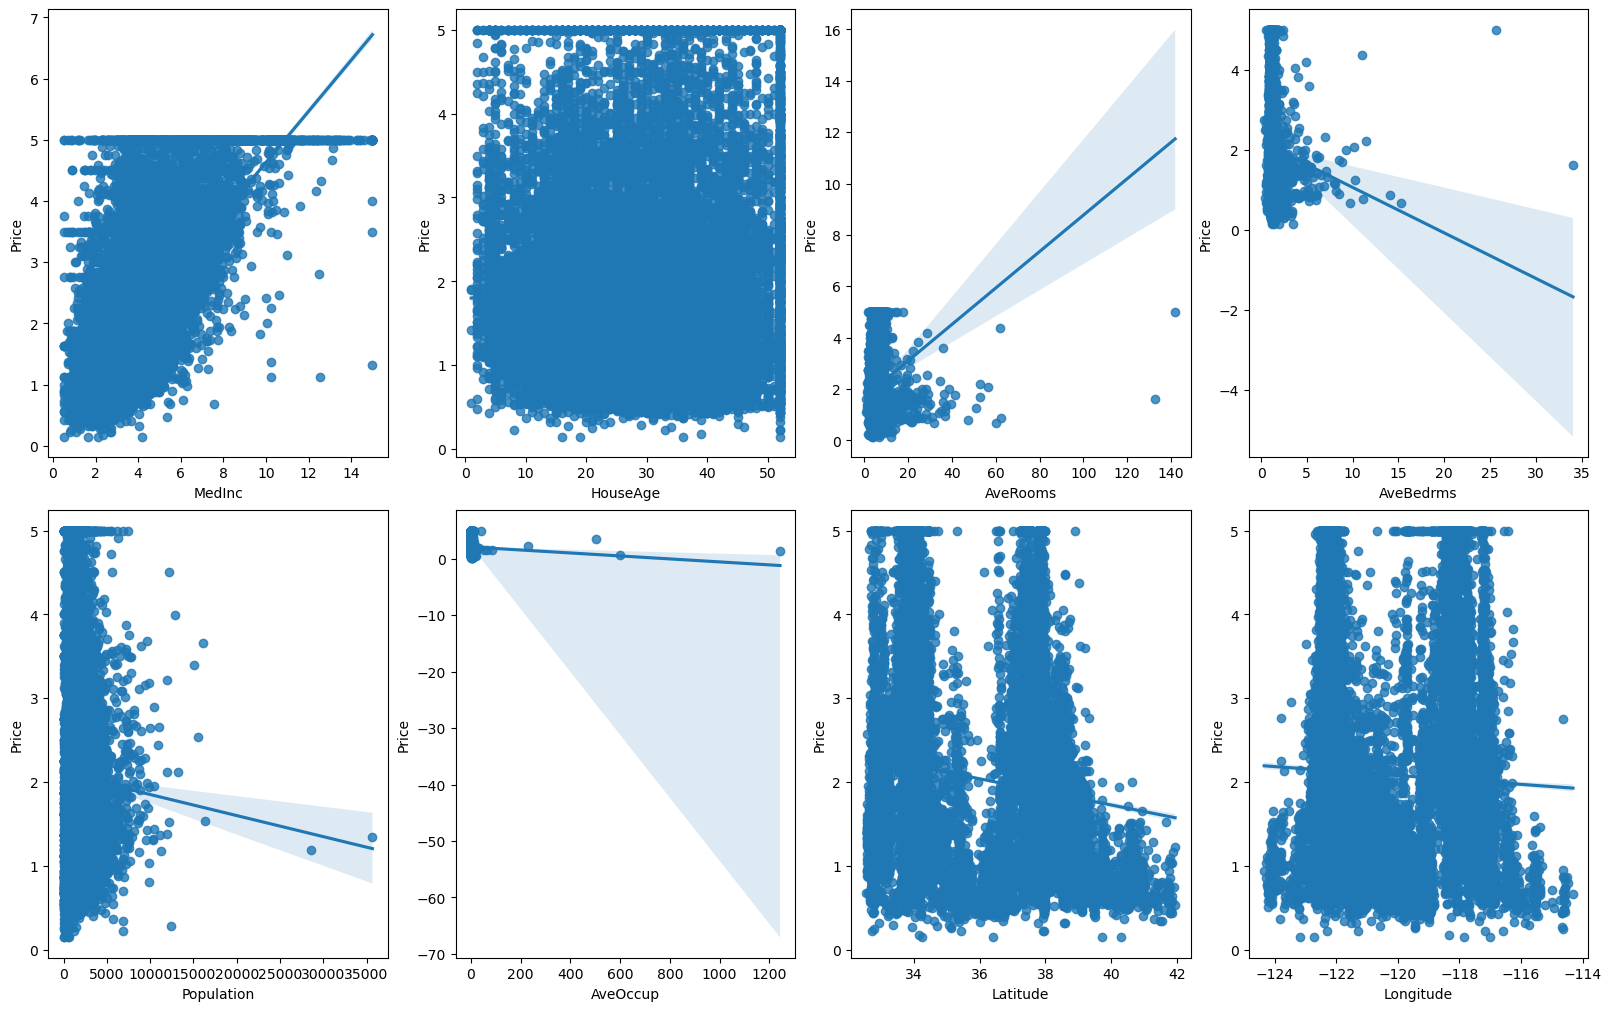

In [28]:
fig, axs = plt.subplots(figsize=(16,10), ncols=4, nrows=2, constrained_layout=True)
features = df_ca.columns

for i, feature in zip(range(8), features):
    row=int(i/4)
    col = i%4
    sns.regplot(x=feature, y=df_ca['Price'], data=df_ca, ax=axs[row][col])

### 2. 데이터 분할

In [29]:
from sklearn.model_selection import train_test_split
df_ca.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'Price', 'dummy'],
      dtype='object')

In [34]:
x = df_ca[['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup','Latitude', 'Longitude']].values
y = df_ca['Price'].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [35]:
print('학습데이터세트 price 평균: ', y_train.mean())
print('평가데이터세트 price 평균: ', y_test.mean())

학습데이터세트 price 평균:  2.071946937378876
평가데이터세트 price 평균:  2.0550030959302323


### 3. 전처리

In [37]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_train_scaled

array([[1.90321513e-01, 6.27450980e-01, 2.92778450e-02, ...,
        2.41381545e-03, 1.70212766e-02, 7.29083665e-01],
       [2.28452021e-01, 9.41176471e-01, 2.54194508e-02, ...,
        8.41584596e-04, 1.29787234e-01, 6.16533865e-01],
       [2.52162039e-01, 5.88235294e-02, 3.37323616e-02, ...,
        1.63434697e-03, 2.24468085e-01, 3.85458167e-01],
       ...,
       [1.67894236e-01, 6.86274510e-01, 2.19672666e-02, ...,
        2.12431472e-03, 1.57446809e-01, 5.94621514e-01],
       [3.59946759e-01, 2.74509804e-01, 3.90473129e-02, ...,
        2.00104707e-03, 5.35106383e-01, 2.38047809e-01],
       [1.43142853e-01, 1.00000000e+00, 1.78250177e-02, ...,
        1.13982070e-03, 5.55319149e-01, 1.92231076e-01]])

### 4. 모델학습

In [38]:
from sklearn.linear_model import LinearRegression

model_lr = LinearRegression()
model_lr.fit(x_train_scaled, y_train)

LinearRegression()

In [39]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score
import numpy as np

In [40]:
y_pred = model_lr.predict(x_train_scaled)

mae = mean_absolute_error(y_train, y_pred)
mse = mean_squared_error(y_train, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_true = y_train, y_pred = y_pred)

print('MAE: {0: .5f}'.format(mae))
print('MSE: {0: .5f}'.format(mse))
print('RMSE: {0: .5f}'.format(rmse))
print('R2: {0: .5f}'.format(r2))

MAE:  0.52863
MSE:  0.51793
RMSE:  0.71968
R2:  0.61255


### 5. 성능평가 및 예측값 저장

In [44]:
x_test_scaled = scaler.transform(x_test)
y_test_pred = model_lr.predict(x_test_scaled)

In [45]:
mae = mean_absolute_error(y_true=y_test, y_pred=y_test_pred)
mse = mean_squared_error(y_true=y_test, y_pred=y_test_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_true=y_test, y_pred=y_test_pred)

print('MAE: {0: .5f}'.format(mae))
print('MSE: {0: .5f}'.format(mse))
print('RMSE: {0: .5f}'.format(rmse))
print('R2: {0: .5f}'.format(r2))

MAE:  0.58542
MSE:  0.71484
RMSE:  0.84548
R2:  0.45449


In [46]:
df_pred = pd.DataFrame(data = y_test_pred, columns=['Pred Price'])
df_pred.head()

,Pred Price
0,0.265329
1,1.343380
2,2.408511
3,2.394020
4,2.262216


In [48]:
model_lr.coef_

array([  6.50587593,   0.49593713, -17.39108272,  19.81593931,
        -0.07241483,  -4.38194802,  -3.94604937,  -4.35442897])

In [49]:
df_actual = pd.DataFrame(data = y_test, columns=['Actual Price'])
df_actual.head()

,Actual Price
0,0.47700
1,0.45800
2,5.00001
3,2.18600
4,2.78000


In [50]:
reg_result = pd.concat([df_actual, df_pred], axis=1)
reg_result.head()

,Actual Price,Pred Price
0,0.47700,0.265329
1,0.45800,1.343380
2,5.00001,2.408511
3,2.18600,2.394020
4,2.78000,2.262216
